Hey! My name is Murat and here I will introduce you my homework. Hope you will enjoy my work!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from google_drive_downloader import GoogleDriveDownloader as gdd
import warnings 
%matplotlib inline

warnings.filterwarnings('ignore')

#In this part I imported libraries needed for analysis, preparation and reduction

In [ ]:
gdd.download_file_from_google_drive(file_id='1mCPUi9nHDHAfHGYf0oi-tnhbkCGTb_Mg', dest_path= '/data/bank-additional-full.csv')

In [ ]:
df = pd.read_csv('/data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()
#Here we can see the head of our dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Alright, we have discovered that our dataset comprises of 4898 observations and 12 characteristics. Also, data has float, integer and object values. There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.



In [ ]:
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
numerical_features = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
#Lists of categorical and numerical features


In [ ]:
df.replace('unknown', np.NaN, inplace=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#percentage of missing values in each column in the given dataset

,Total,Percent
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231
age,0,0.000000
poutcome,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


In [ ]:
#The number of unique values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [ ]:
df.describe()
#descriptive statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


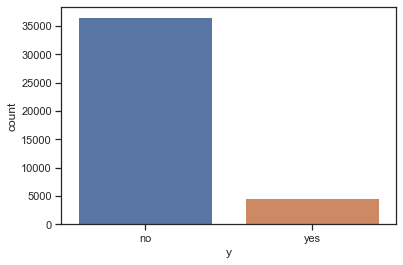

In [ ]:
ax = sns.countplot(x = df["y"])  
plt.show()
#As we can see the number of 'no' is more than 'yes'

Job


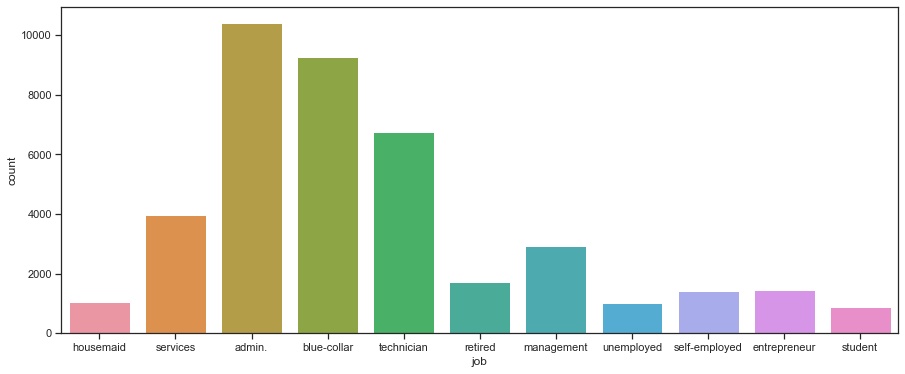

Marital


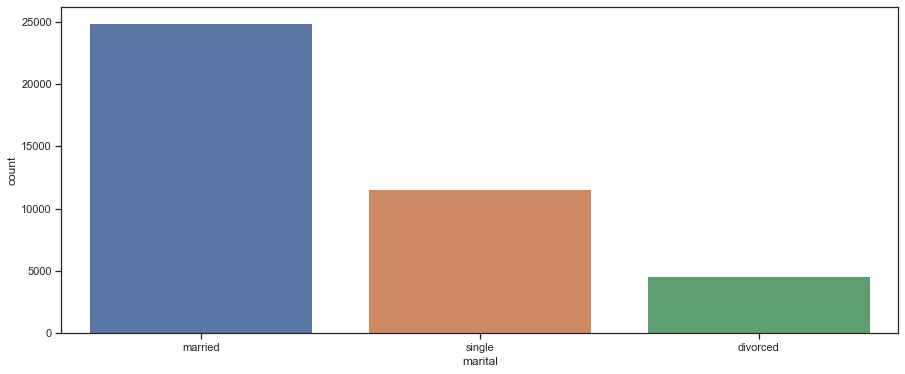

Education


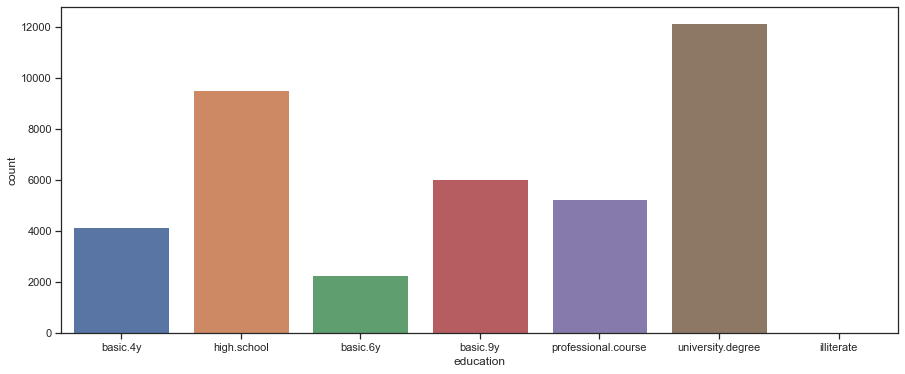

Default


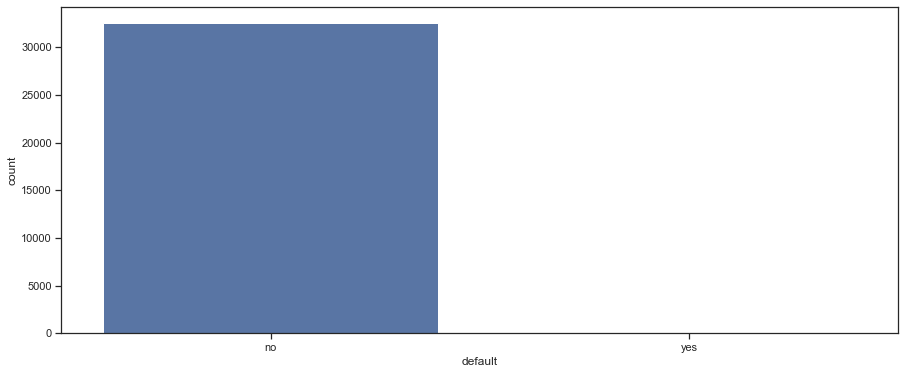

Housing


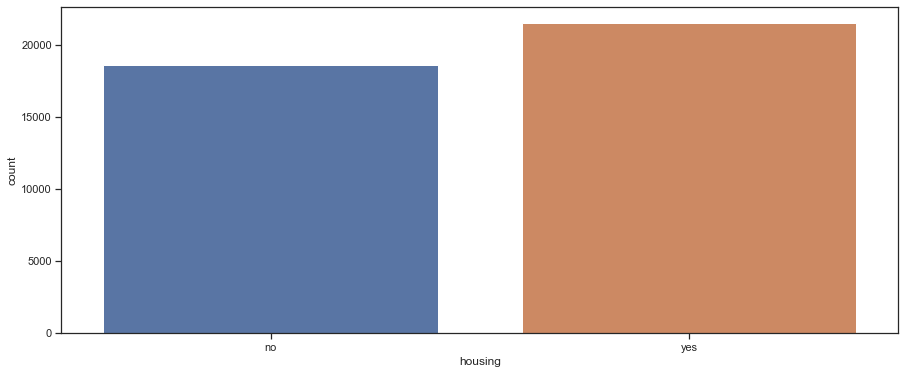

Loan


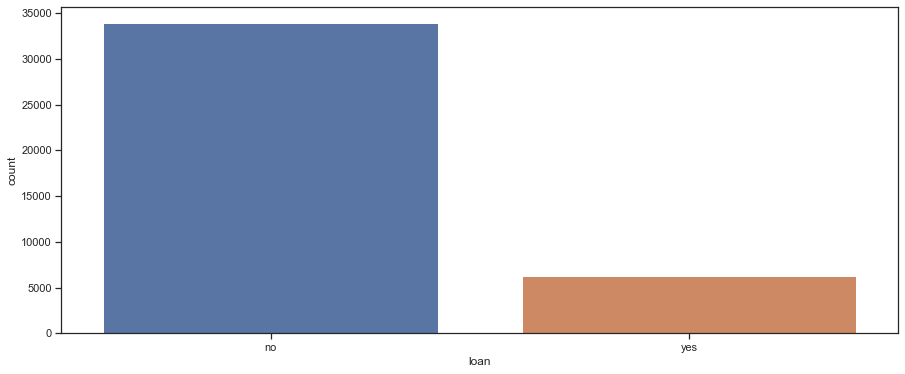

Contact


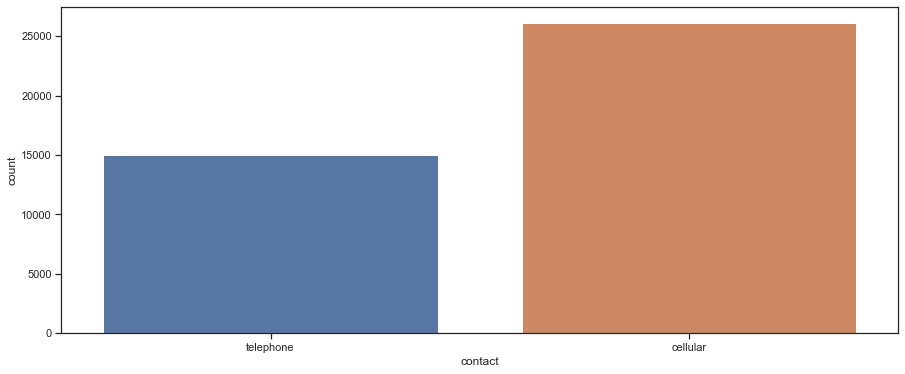

Month


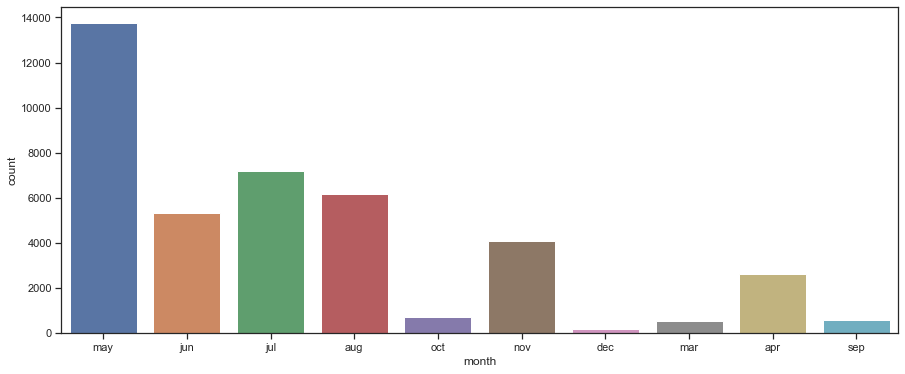

Day_Of_Week


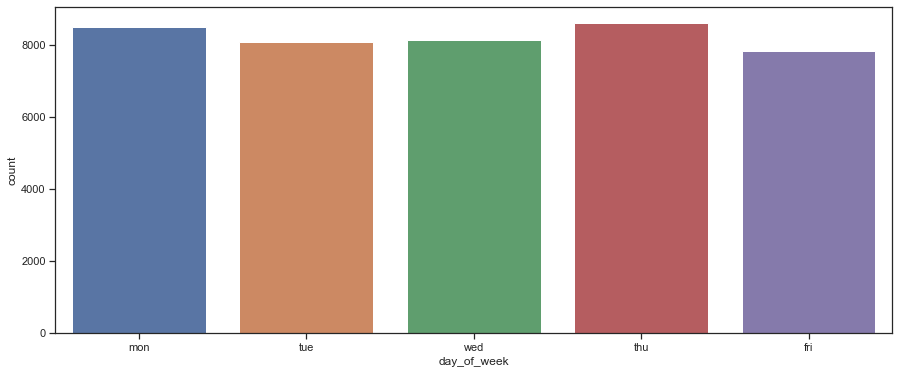

Poutcome


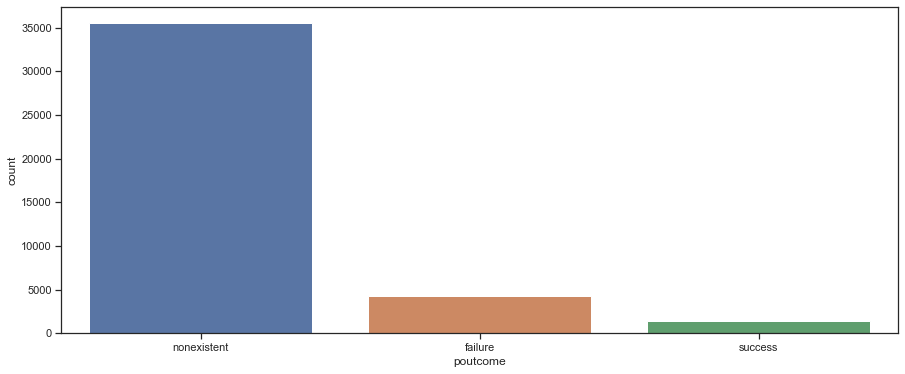

In [ ]:
for column in categorical_features:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    plt.show()

Job


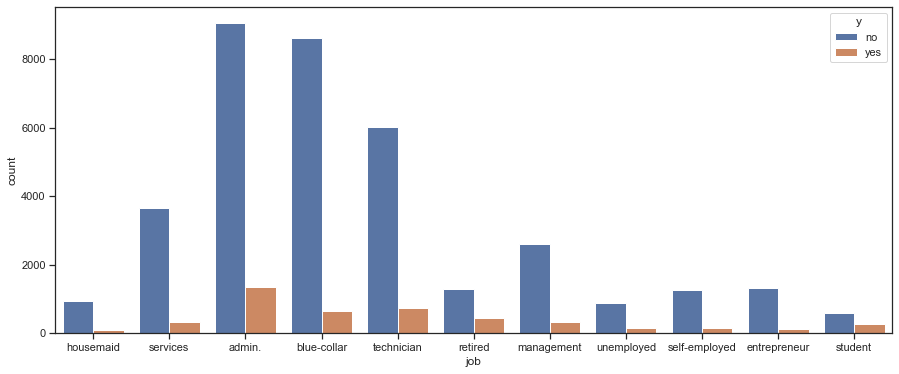

Marital


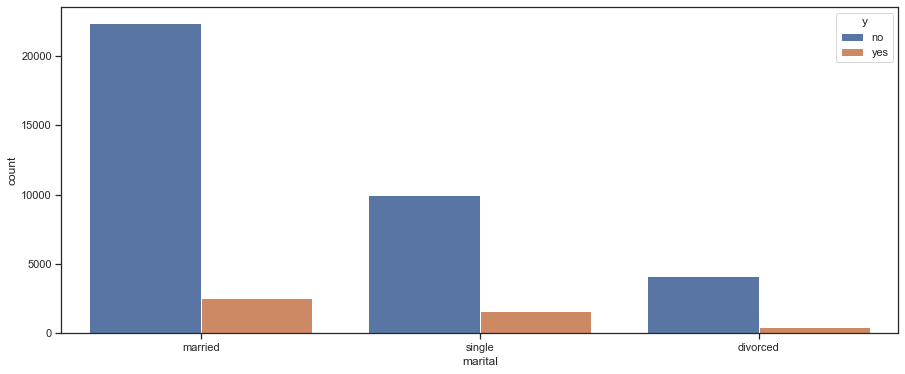

Education


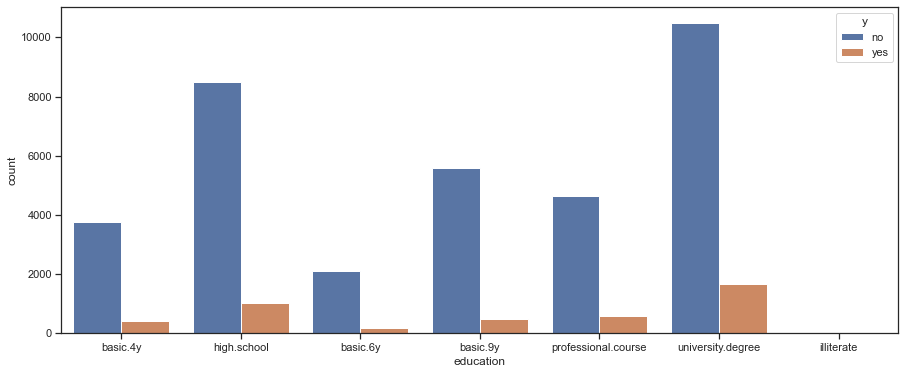

Default


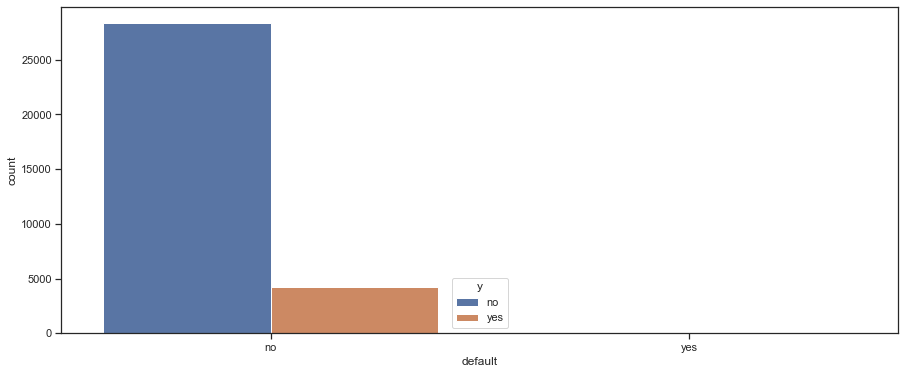

Housing


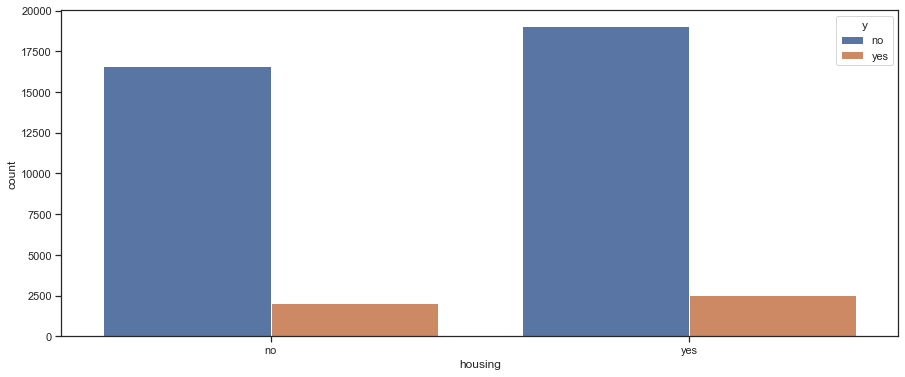

Loan


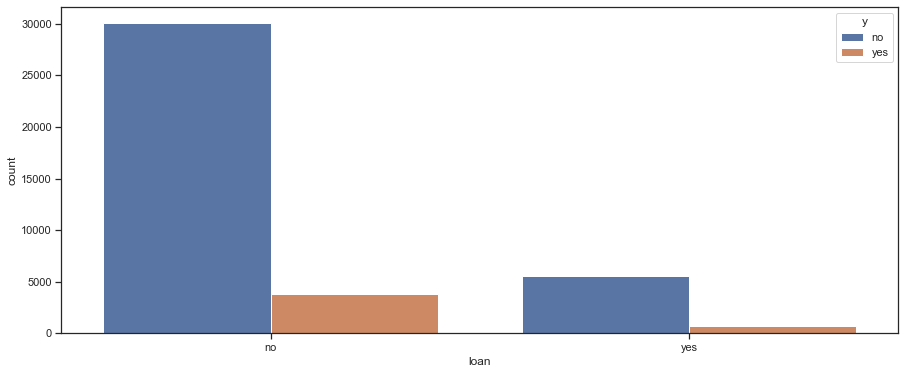

Contact


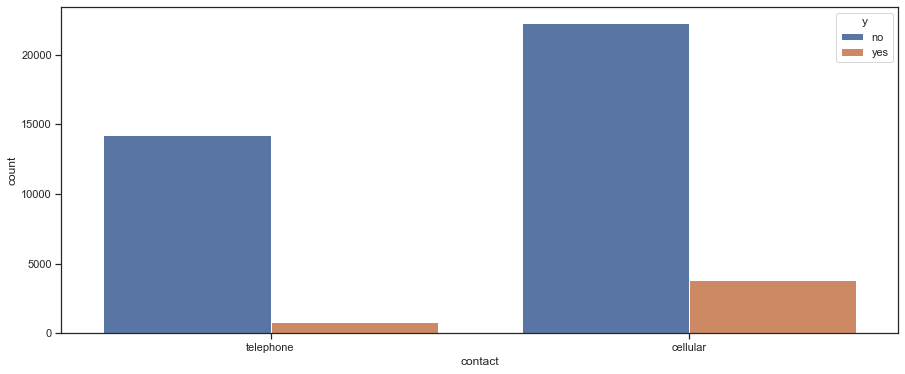

Month


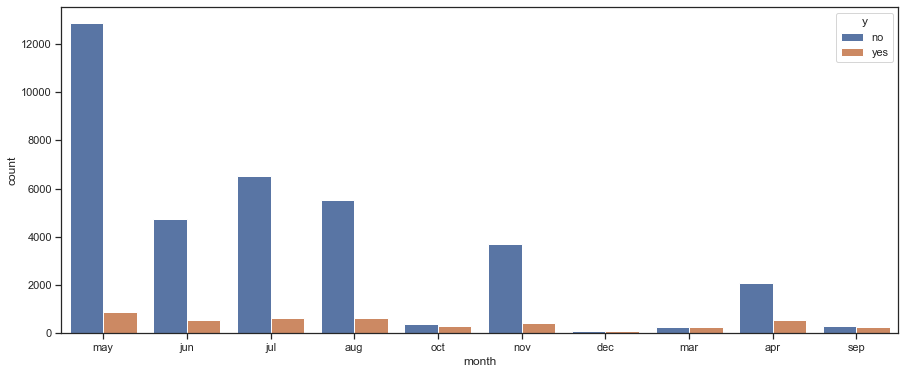

Day_Of_Week


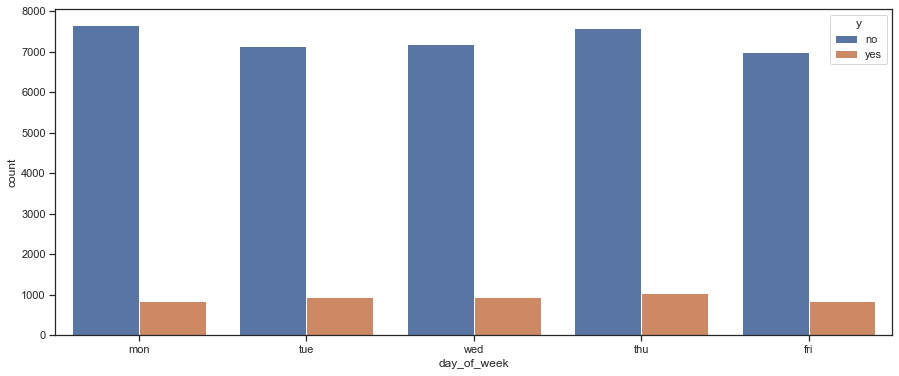

Poutcome


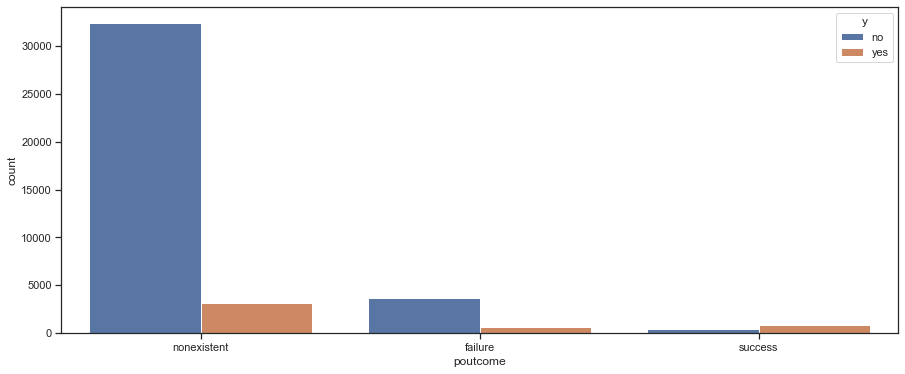

In [ ]:
for column in categorical_features:
    plt.figure(figsize=(15, 6))
    print(column.title())
    sns.countplot(x = df[column], hue=df["y"])
    plt.show()

Age


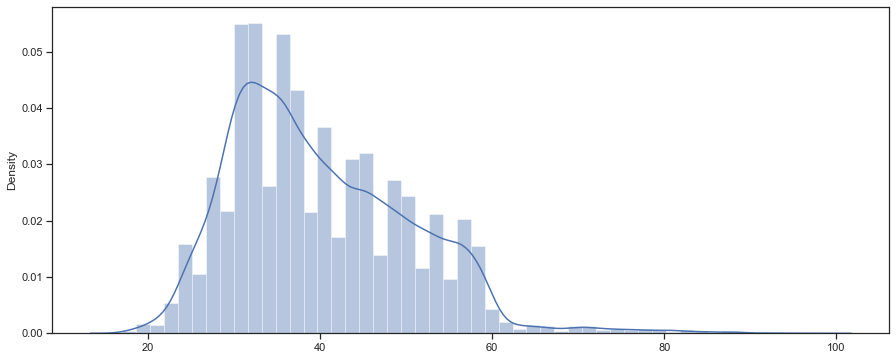

Duration


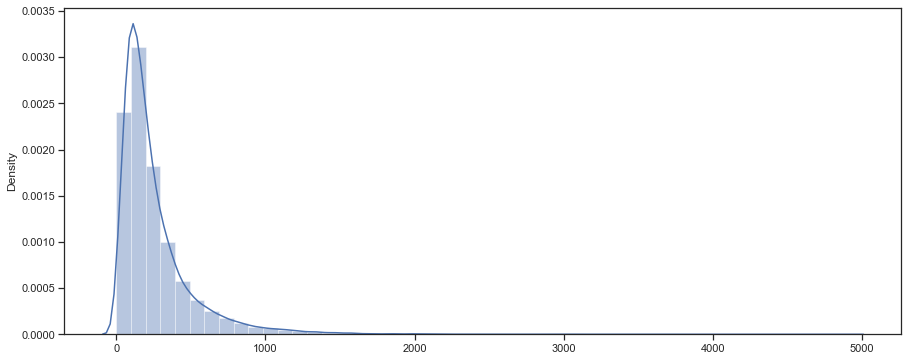

Campaign


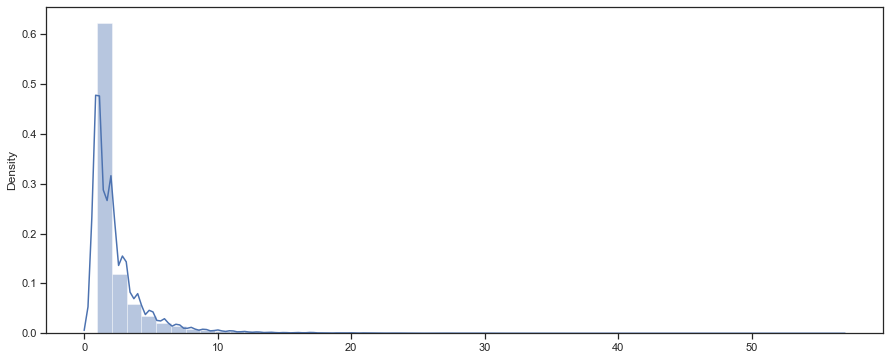

Pdays


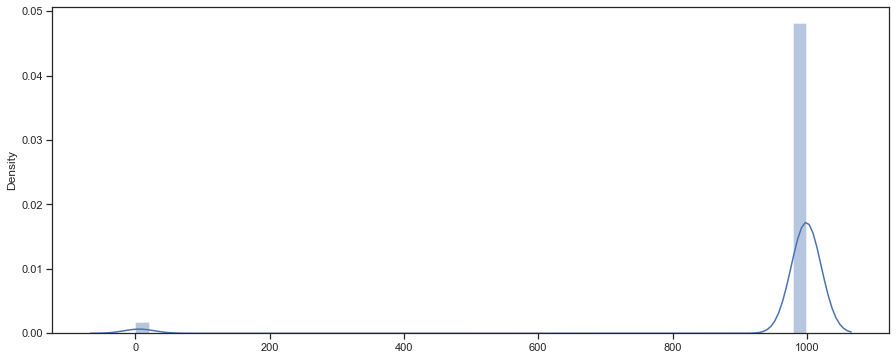

Previous


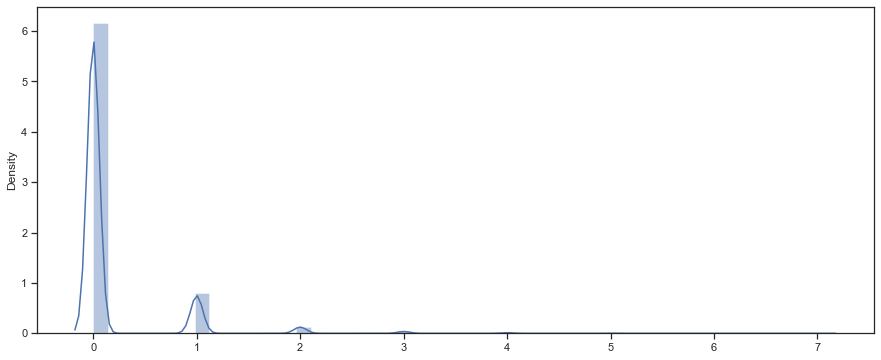

Emp.Var.Rate


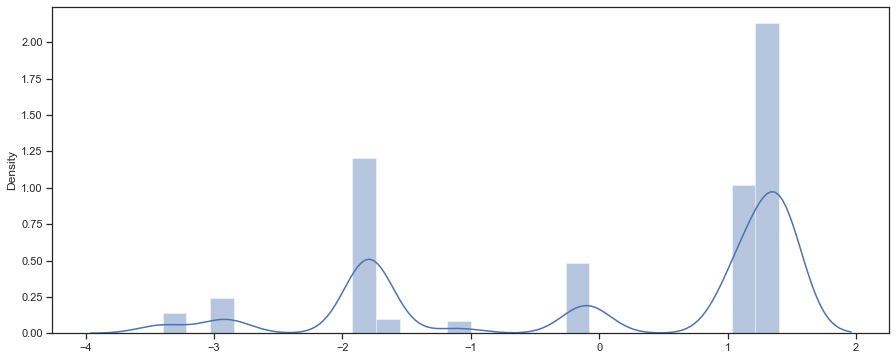

Cons.Price.Idx


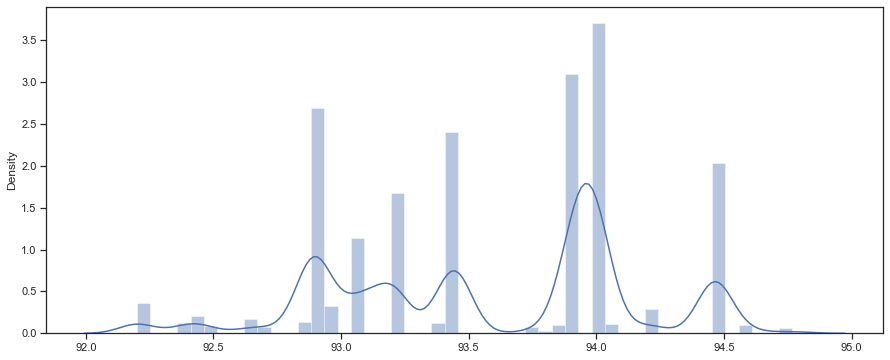

Cons.Conf.Idx


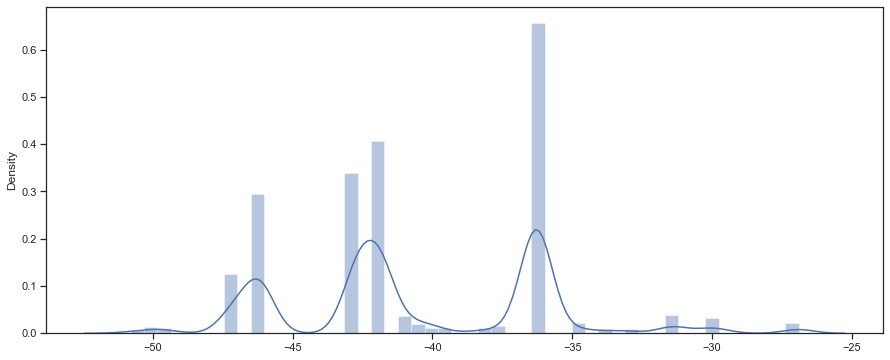

Euribor3M


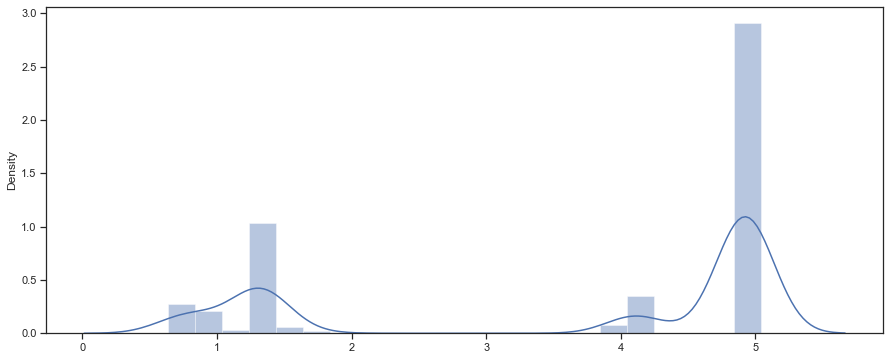

Nr.Employed


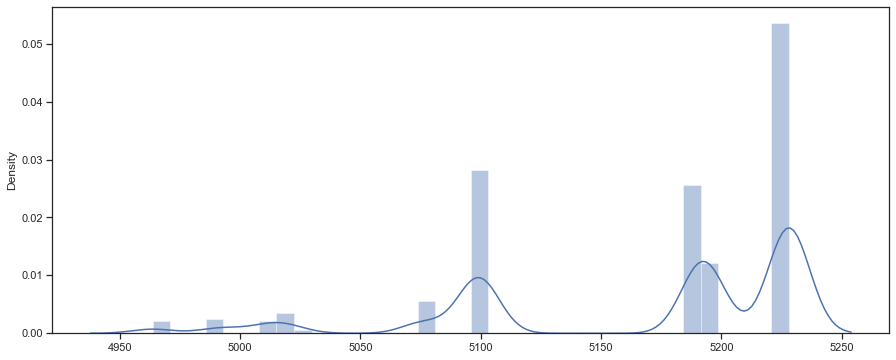

In [ ]:
for column in numerical_features:
    plt.figure(figsize=(15, 6))
    print(column.title())
    sns.distplot(x = df[column])
    plt.show()

# This is the destribution of numerical features

Age


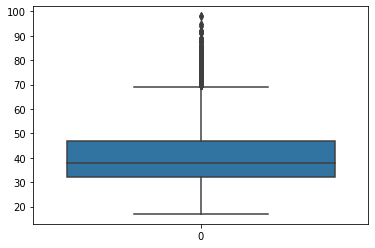

Duration


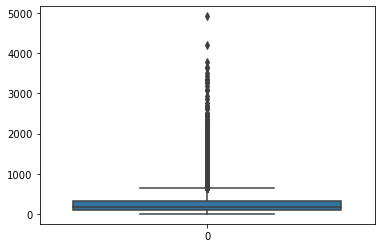

Campaign


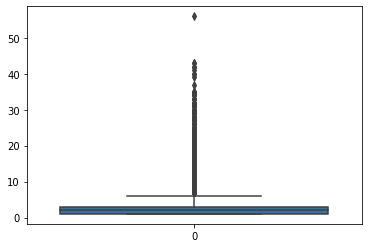

Pdays


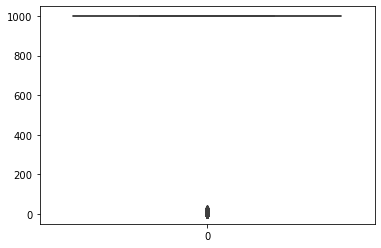

Previous


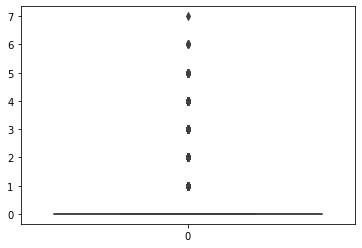

Emp.Var.Rate


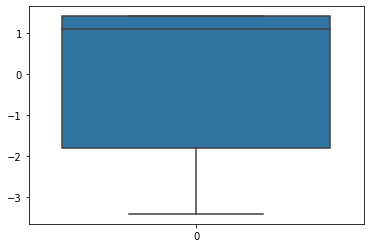

Cons.Price.Idx


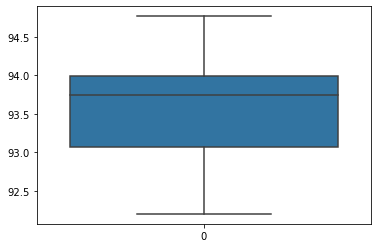

Cons.Conf.Idx


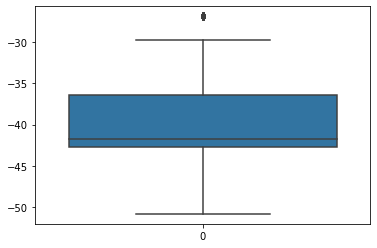

Euribor3M


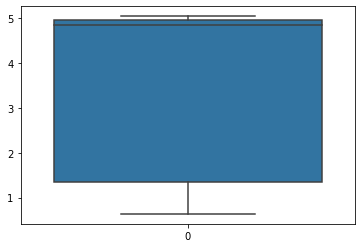

Nr.Employed


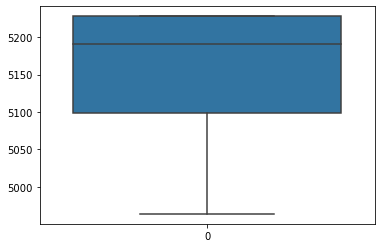

In [ ]:
for column in numerical_features:
    print(column.title())
    sns.boxplot(data = df[column])
    plt.show()

Okay, let's sum up what we have discovered. 
The highest missing percentage has column 'default' also it doesn't affect target variable. So we will drop this feature.
Columns 'Duration', 'Campaign' and 'Age' are close to normal deviation.
Some outliers found in 'PDays', 'Cons.Conf.Idx', 'Duration', 'Campaign'.

In [ ]:
df.drop(["default"], axis = 1, inplace=True)
categorical_features = list(set(categorical_features) - set(['default']))

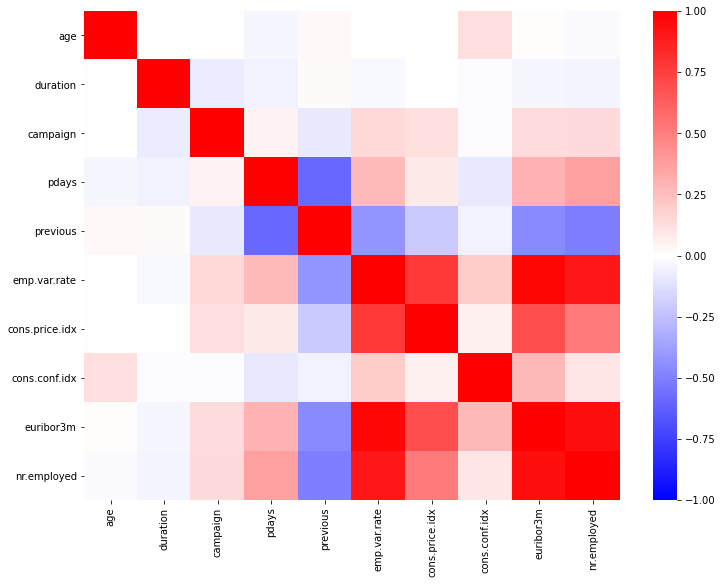

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df[numerical_features].corr(), vmin=-1, vmax=1, cmap='bwr')
plt.show()

Positive high correlation between: \
'emp.var.rate' and 'nr.employed' \
'emp.var.rate' and 'euribor3m' \
'euribor3m' and 'nr.employed 

In [ ]:
le = LabelEncoder() 
df["y"] = le.fit_transform(df["y"])
#Using LabelEncoder for target variable

In [ ]:
df.dropna(inplace=True)

In [ ]:
#One Hot Encoding for categorical variables
contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [ ]:
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)


In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,no,no,261,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,0,0,0,0
1,57,no,no,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0
2,37,yes,no,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0
3,40,no,no,151,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,0,0
4,56,no,yes,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
df["loan"] = le.fit_transform(df["loan"])
df["housing"] = le.fit_transform(df["housing"])

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,0.481481,0,0,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,...,1,0,0,0,0,0,0,0,0,0
1,0.493827,0,0,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,...,1,0,0,0,0,0,1,0,0,0
2,0.246914,1,0,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,...,1,0,0,0,0,0,1,0,0,0
3,0.283951,0,0,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,...,1,0,0,0,1,0,0,0,0,0
4,0.481481,0,1,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,...,1,0,0,0,0,0,1,0,0,0


PCA

In [ ]:
pca = PCA(n_components=2)
new_X = pca.fit_transform(df)

In [ ]:
y = ['y']

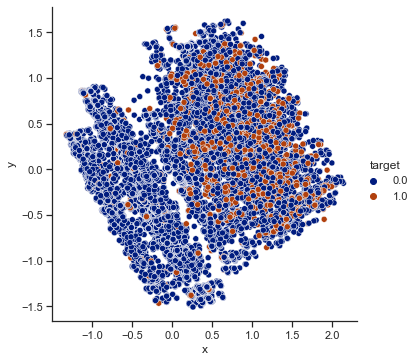

In [ ]:
plot_df = pd.DataFrame.from_records(data=new_X[:,:2],columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='dark')
#This is PCA

In [ ]:
pca.explained_variance_ratio_.sum()
#explained variance

0.2069852501078871

In [ ]:
pca = PCA(n_components=0.95).fit(df)

len(pca.explained_variance_ratio_)
#27 is the best number of components

27

SVD

In [ ]:
svd = TruncatedSVD(n_components=2, algorithm='arpack')
svd_X = svd.fit_transform(df)

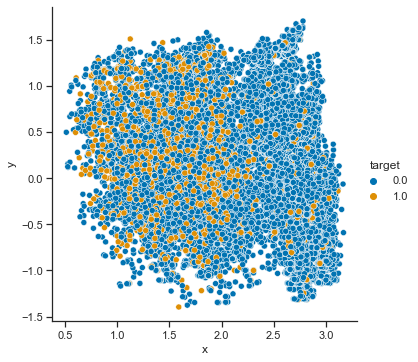

In [ ]:
plot_df = pd.DataFrame.from_records(data=svd_X[:,:2],columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='colorblind')

In [ ]:
svd.explained_variance_ratio_.sum()

0.15959312113196983

t-SNE


In [ ]:
tsne = TSNE()
tsne_X = tsne.fit_transform(df)

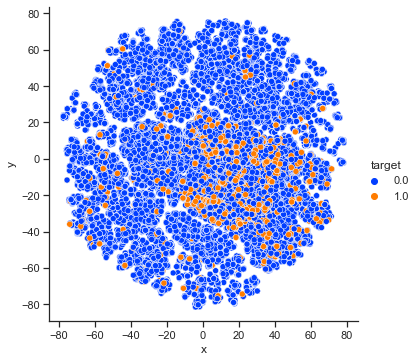

In [ ]:
plot_df = pd.DataFrame.from_records(data=tsne_X,columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='bright')

Conclusion \
Honestly, I don't think I was precise doing this work and there are mistakes to found. Maybe if I wasn't sick all week I would do it better \
Anyway, I'm open to any feedback and feel free to make as more remarks as it should be \
Peace 